In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Accuracy
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## Данные

**Загружаем данные**

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

Text(0.5, 1.0, '9')

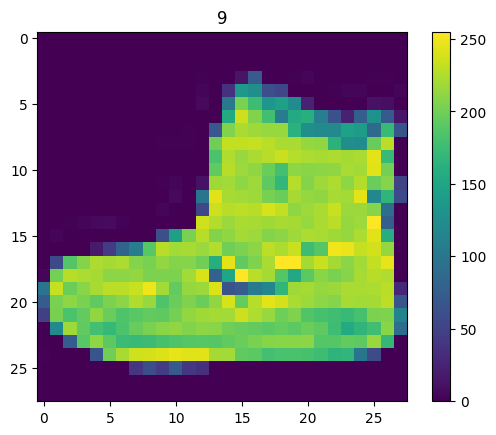

In [ ]:
plt.imshow(x_train[0], cmap='viridis')
plt.colorbar()
plt.title(y_train[0])

## Предобработка

**Нормализуйте данные X_train и X_test **

In [ ]:
x_train = (np.expand_dims(x_train, axis=-1)/255).astype(np.float32)
y_train = y_train.astype(np.int64)

x_test = (np.expand_dims(x_test, axis=-1)).astype(np.float32)
y_test = y_test.astype(np.int64)

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

**Преобразуйте  y_train и y_test в one_hot представления **

In [ ]:
y_train = np.eye(y_train.max() + 1)[y_train]

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_test = np.eye(y_test.max() + 1)[y_test]

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU

* Выходной полносвязный слой с 10 нейронами с softmax

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
model = Sequential()

conv_layer = Conv2D(filters=32, kernel_size=(4, 4), activation='relu')
max_pooling_layer = MaxPooling2D(pool_size=(2, 2))
flatten_layer = Flatten()
input_dense = Dense(units=128,activation='relu')
output_dense = Dense(units=10,activation='softmax')


model.add(conv_layer)
model.add(max_pooling_layer)
model.add(flatten_layer)
model.add(input_dense)
model.add(output_dense)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [ ]:
model.fit(x_train,y_train,epochs=12, batch_size=32)

Epoch 1/12
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3373 - accuracy: 0.8803
Epoch 2/12
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2637 - accuracy: 0.9042
Epoch 3/12
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2279 - accuracy: 0.9161
Epoch 4/12
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2024 - accuracy: 0.9263
Epoch 5/12
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1809 - accuracy: 0.9348
Epoch 6/12
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1627 - accuracy: 0.9416
Epoch 7/12
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1469 - accuracy: 0.9474
Epoch 8/12
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1329 - accuracy: 0.9532
Epoch 9/12
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1205 - accuracy: 0.9564
Epoch 10/12
1875/1875 [==============================] - 37s 20m

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [ ]:
true_classes = np.argmax(y_test,axis=1)
pred_classes = np.argmax(y_pred,axis=1)

In [ ]:
print(classification_report(true_classes, pred_classes))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1000
           1       0.99      0.95      0.97      1000
           2       0.87      0.76      0.81      1000
           3       0.88      0.87      0.88      1000
           4       0.68      0.93      0.78      1000
           5       0.93      0.97      0.95      1000
           6       0.75      0.51      0.61      1000
           7       0.96      0.92      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



## Проверка

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]')

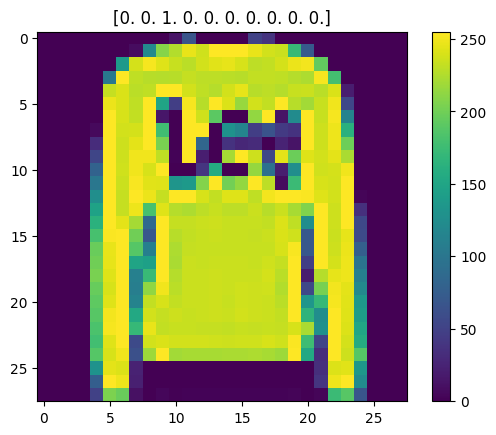

In [ ]:
plt.imshow(x_test[1], cmap='viridis')
plt.colorbar()
plt.title(y_test[1])